## KrisFace GAN

Reimplementing a basic GAN with the fastai framework

In [86]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [47]:
import fastai
from fastai.vision import *
from fastai.callbacks import *


In [5]:
path = pathlib.Path('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1')

### Data Preprocessing

In [ ]:
path_og = path/'original'
path_land = path/'landmarks'
path_land_lr = path/'landmarks-96'
path_land_mr = path/'landmarks-256'
path_og_lr = path/'original-96' #low res
path_og_mr = path/'original-256' #medium res

In [54]:
il = ImageList.from_folder(path_og)
src = ImageList.from_folder(path_land)

In [58]:
il??

In [65]:
il.items[0]

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original/304.png')

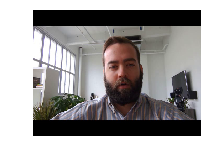

In [68]:
il[0].show()

In [106]:
im = PIL.Image.open('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original/304.png')
im = PIL.Image.open(il.items[0])

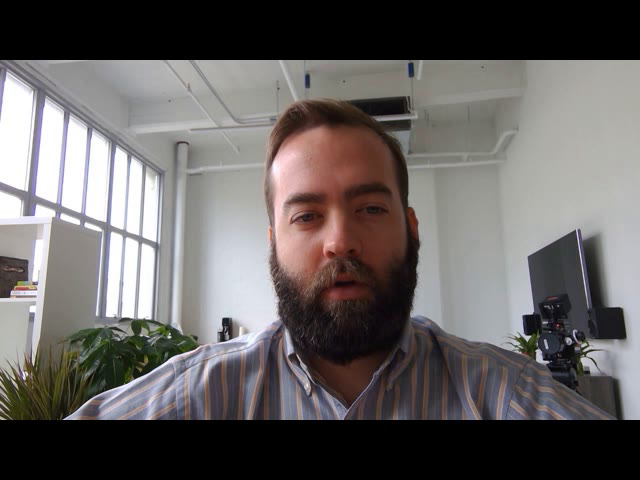

In [107]:
im

In [120]:
#  For example, a rectangle covering all of an 800x600 pixel image is written as (0, 0, 800, 600).
#  if you want the top left 46x46, use (0, 0, 46, 46).
im = PIL.Image.open(il.items[0])
im = im.crop([0, 60, 640, 420])
im.size

((640, 360),)

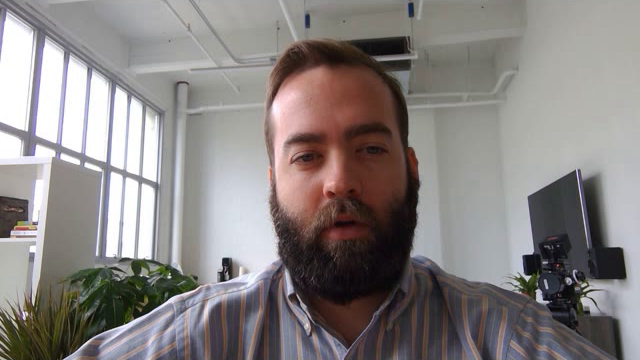

In [121]:
im

In [124]:
#want to resize my og images to 96 (lr) and 256 (mr)
def resize_one(fn, img, path, size):
    dest = path/fn.relative_to(path_og) 
    print(dest)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    img = img.crop([0, 60, 640, 420])
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=90) #95 is most, 75 is default

In [125]:
# #create smaller og pics first time this nb is run
sets = [(path_og_lr, 96), (path_og_mr, 256)]
for p,size in sets:
    if not p.exists():
        print(f'resizing to {size} into {p}')
        parallel(partial(resize_one, path=p, size=size), il.items)

resizing to 256 into /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/304.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/367.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/340.png


/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/332.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/281.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/221.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/17.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/142.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/260.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/293.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/349.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/139.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/235.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/75.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/185.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/99.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/385.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/366.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/378.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/122.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/480.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/391.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/23.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/346.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/447.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/498.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/59.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/479.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/74.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/311.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/4

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/493.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/125.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/62.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/36.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/438.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/396.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/399.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/470.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/298.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/132.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/370.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/271.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/519.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/120.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/263.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/382.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/335.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/341.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-25

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/156.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/135.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/454.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/214.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/524.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/178.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/430.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/345.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/70.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/143.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/25.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/245.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/364.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/57.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/31.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/26.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/496.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/3.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original-256/24.p

In [126]:
#landmarks
def resize_one(fn, img, path, size):
    dest = path/fn.relative_to(path_land) 
    print(dest)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    img = img.crop([0, 60, 640, 420])
    img.crop
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=95) #95 is most, 75 is default

In [127]:
#create smaller og pics first time this nb is run
sets = [(path_land_lr, 96), (path_land_mr, 256)]
for p,size in sets:
    if not p.exists():
        print(f'resizing to {size} into {p}')
        parallel(partial(resize_one, path=p, size=size), src.items)

resizing to 96 into /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/304.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/367.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/340.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/17.png


/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/332.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/142.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/281.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/221.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/293.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/349.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/260.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/139.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/520.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-9

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/75.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/185.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/99.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/122.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/366.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/385.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/378.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/462.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/480.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/23.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/391.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/498.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/59.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/311.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/447.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/400.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/74.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/479.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/3

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/409.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/36.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/438.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/62.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/396.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/399.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/470.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/196.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/298.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/370.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/132.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/519.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/120.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/335.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/341.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/382.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/263.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/358.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-9

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/454.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/345.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/524.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/430.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/178.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/214.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/70.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/528.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/166.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/31.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/25.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/245.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/364.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/57.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/26.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/496.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/24.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/3.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96/492.p

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/129.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/532.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/318.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/131.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/292.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/315.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/157.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/426.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/217.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/la

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/134.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/141.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/51.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/138.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/462.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/339.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/403.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/4.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/368.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landm

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/498.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/258.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/392.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/2.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/362.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/336.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/47.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/98.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/369.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landma

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/196.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/357.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/537.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/111.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/92.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/97.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/523.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/130.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/302.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/land

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/358.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/382.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/63.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/405.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/331.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/257.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/78.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/485.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/181.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/land

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/345.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/445.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/528.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/166.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/164.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/278.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/239.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/70.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/440.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/lan

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/26.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/496.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/3.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/165.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/526.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/24.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/112.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/492.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-256/65.png
/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmar

(PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original'),
 torch.Size([3, 480, 640]),
 None)

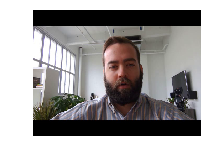

In [128]:
il = ImageList.from_folder(path_og)
src = ImageList.from_folder(path_land)
path_og, il[0].shape, il[0].show()

In [34]:
il

ImageList (540 items)
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/original

### Model Setup

In [129]:
arch = models.resnet34

In [130]:
src = ImageImageList.from_folder(path_land_lr).split_by_rand_pct(0.1, seed=42)

In superRes, he creates a resize fn. <br>
He squishes imgs and saves them in path_lr, already have my lowres imgs <br>
He creates an ImageList for LR data <br>
In his get_data fn, he pairs LR and HR w/ a lambda fn

In [39]:
src

ItemLists;

Train: ImageImageList (486 items)
Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96;

Valid: ImageImageList (54 items)
Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/krisFace_test1/landmarks-96;

Test: None

In [40]:
get_transforms??
tfms = get_transforms(do_flip=False, max_lighting=0.0, max_zoom=1.5, )

In [15]:
'''
Transforms 
- Paired relationship b/t input and output, so do_y=True
flips - doesn't make sense
lighting - doesn't make sense
warping - doesn't make sense w/ the boundaries, w/out it might
zoom makes sense
Decision:
max_zoom - can probably be nixed
tfm_y - definitely can be nixed
get_data tfms img_size, but have higher rez imgs. Run later layers w/ path_og_mr?
'''
def get_data(bs, size):
    data = (src.label_from_func(lambda x: path_og_lr/x.name)
           .transform(tfms, size=size, tfm_y=True)
           .databunch(bs=bs).normalize(do_y=True))
    
    data.c = 3 #????
    return data

In [16]:
bs, size = 32, 96

In [21]:
data = get_data(bs, size)

In [23]:
type(data)

fastai.vision.data.ImageDataBunch

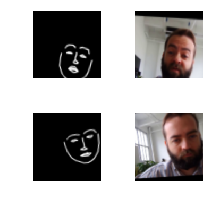

In [25]:
data.show_batch(ds_type=DatasetType.Train, rows=2, figsize=(3,3))

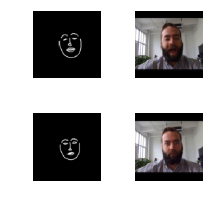

In [26]:
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(3,3))

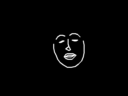

In [28]:
data.valid_ds.x[0]

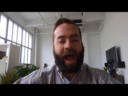

In [29]:
data.valid_ds.y[0]

# Train - Orig: Feature Loss

Want to deconv 4x up

In [30]:
t = data.valid_ds[0][1].data
t = torch.stack([t,t])

In [31]:
def gram_matrix(x):
    n,c,h,w = x.size()
    x = x.view(n, c, -1)
    return (x @ x.transpose(1,2))/(c*h*w)

In [32]:
base_loss = F.l1_loss
# F?? #module 'torch.nn.functional'
#instead of MSE

In [33]:
#vgg pretrained model (.features is the conv part of the vgg model)
from torchvision.models import vgg16_bn

vgg_m = vgg16_bn(True).features.cuda().eval()
requires_grad(vgg_m, False) #False means don't update weights and just use for loss

In [34]:
#enumerate through all the children of model and find maxPool layers
#that's where the grid size changes
blocks = [i-1 for i,o in enumerate(children(vgg_m)) if isinstance(o,nn.MaxPool2d)]
blocks, [vgg_m[i] for i in blocks]

([5, 12, 22, 32, 42],
 [ReLU(inplace), ReLU(inplace), ReLU(inplace), ReLU(inplace), ReLU(inplace)])

In [35]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

In [36]:
feat_loss = FeatureLoss(vgg_m, blocks[2:5], [5,15,12])

# Train (feature loss)

## Low Res Training and Fine Tuning

#### LR Training

In [37]:
wd = 1e-3
learn = unet_learner(data, arch, wd=wd, loss_func=feat_loss, callback_fns=LossMetrics,
                     blur=True, norm_type=NormType.Weight)
gc.collect();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


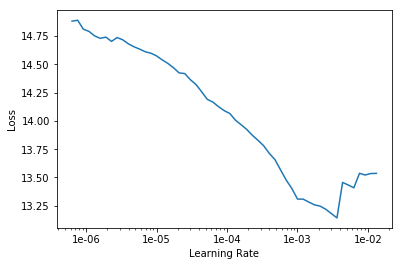

In [33]:
learn.lr_find()
learn.recorder.plot()

In [41]:
lr = 1e-4

In [42]:
def do_fit(save_name, lrs=slice(lr), pct_start=0.9, epochs=10):
    learn.fit_one_cycle(epochs, lrs, pct_start=pct_start)
    learn.save(save_name)
    learn.show_results(rows=2, imgsize=5)

### Log:
- Model_name            Epochs    Unfrozen?
- myFace-Generator-1a   200       No 
- myFace-Generator-1b   100       Yes
- myFace-Generator-1c   200       No
- myFace-Generator-256a 20        No <- could prolly train more epochs, was on its way
- myFace-Generator-256b 200        Yes

In [ ]:
learn_log = [('myFace-Generator-1a', 'frozen', 200, null, 1e-3)]

epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,5.466208,3.410677,0.571327,0.215446,0.229242,0.238642,0.396578,0.610779,1.148663,00:11
1,5.395327,3.370341,0.566645,0.214436,0.227382,0.235124,0.394526,0.607182,1.125046,00:11
2,5.424474,3.384581,0.573082,0.215763,0.227607,0.233643,0.400459,0.610560,1.123468,00:11
3,5.398039,3.383208,0.584360,0.215063,0.226783,0.234482,0.398525,0.606038,1.117957,00:11
4,5.428482,3.374806,0.578605,0.215339,0.226804,0.235839,0.392931,0.603305,1.121984,00:11
5,5.435406,3.434327,0.588295,0.216502,0.228271,0.236997,0.403870,0.612389,1.148003,00:11
6,5.445273,3.409412,0.589354,0.215969,0.227973,0.236692,0.396853,0.606144,1.136426,00:11
7,5.419148,3.381018,0.577268,0.214372,0.227125,0.236442,0.395581,0.606973,1.123257,00:11
8,5.407383,3.362979,0.575960,0.215265,0.226225,0.232870,0.396722,0.605278,1.110658,00:11
9,5.400292,3.425925,0.584177,0.216905,0.228501,0.239045,0.403048,0.611246,1.143002,00:11


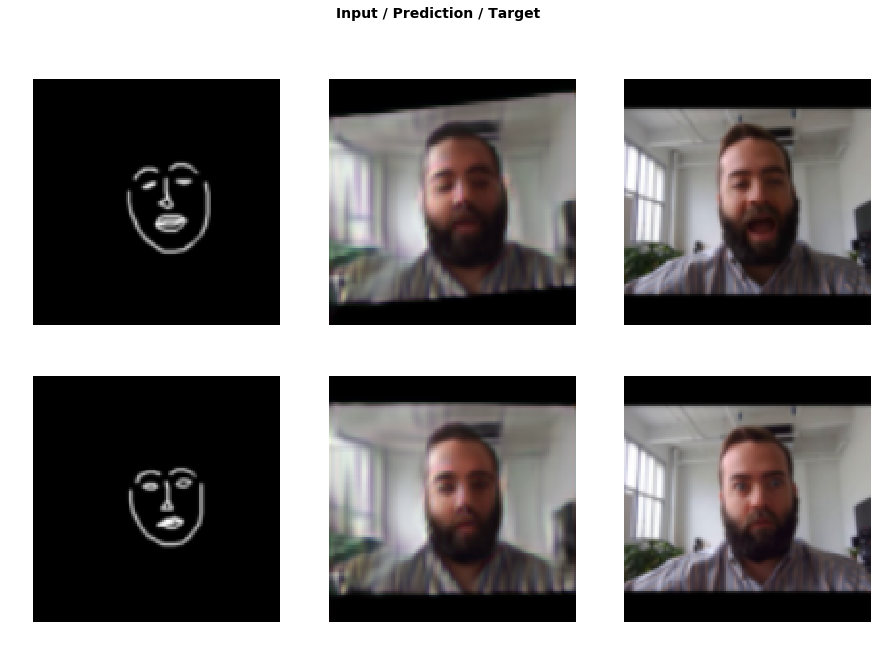

In [41]:
lr = 1e-4
learn_log = [('myFace-Generator-1a', 'frozen', null, 1e-3)]
do_fit('myFace-Generator-1a', slice(lr*10), epochs=100)

lol this has no chance!!!!

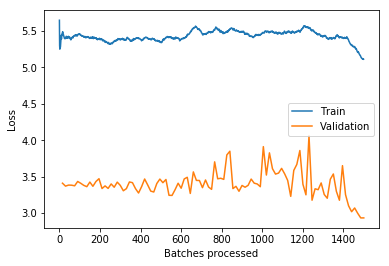

In [44]:
learn.recorder.plot_losses()

#### LR Fine Tuning

In [43]:
learn.load('myFace-Generator-1a')

/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type FeatureLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Learner(data=ImageDataBunch;

Train: LabelList (486 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96;

Valid: LabelList (54 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)

In [44]:
learn.unfreeze()

In [ ]:
do_fit('myFace-Generator-1b', slice(lr*10), epochs=100)

In [ ]:
learn_log = [('myFace-Generator-1b', 'unfrozen', 50, null, 1e-3)]

And for inferences the learn.export, learn.destroy and load_learner sequence will require even less RAM.

In [45]:
gc.collect();


In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


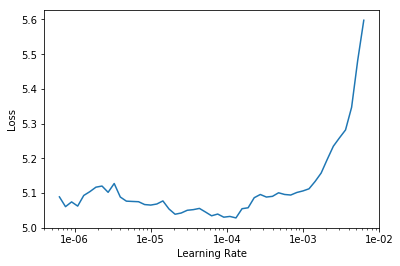

In [47]:
learn.recorder.plot()

In [48]:
lr = 3e-3

In [ ]:
learn_log = [('myFace-Generator-1c', 'frozen', 200, 1e-5, 3e-3)]

epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,4.282263,2.334755,0.398418,0.137399,0.138651,0.171361,0.261993,0.385253,0.841680,00:11
1,4.297620,2.382648,0.399729,0.137321,0.138899,0.174923,0.257161,0.390117,0.884497,00:11
2,4.307675,2.317485,0.390117,0.136089,0.137218,0.170654,0.256313,0.381683,0.845410,00:11
3,4.296073,2.313315,0.389698,0.136453,0.137570,0.170193,0.253480,0.383416,0.842506,00:11
4,4.303925,2.312813,0.393484,0.137368,0.138147,0.169867,0.256884,0.382968,0.834093,00:11
5,4.296476,2.334193,0.399204,0.138709,0.139594,0.170829,0.255337,0.386833,0.843689,00:11
6,4.326742,2.312357,0.388148,0.135967,0.136521,0.170227,0.254058,0.380562,0.846875,00:11
7,4.325814,2.313734,0.388925,0.136121,0.136770,0.170417,0.252762,0.382023,0.846715,00:11
8,4.318595,2.301445,0.388740,0.135904,0.136708,0.169232,0.252548,0.380999,0.837315,00:11
9,4.355103,2.300592,0.390462,0.136161,0.136723,0.169113,0.252144,0.381769,0.834219,00:11


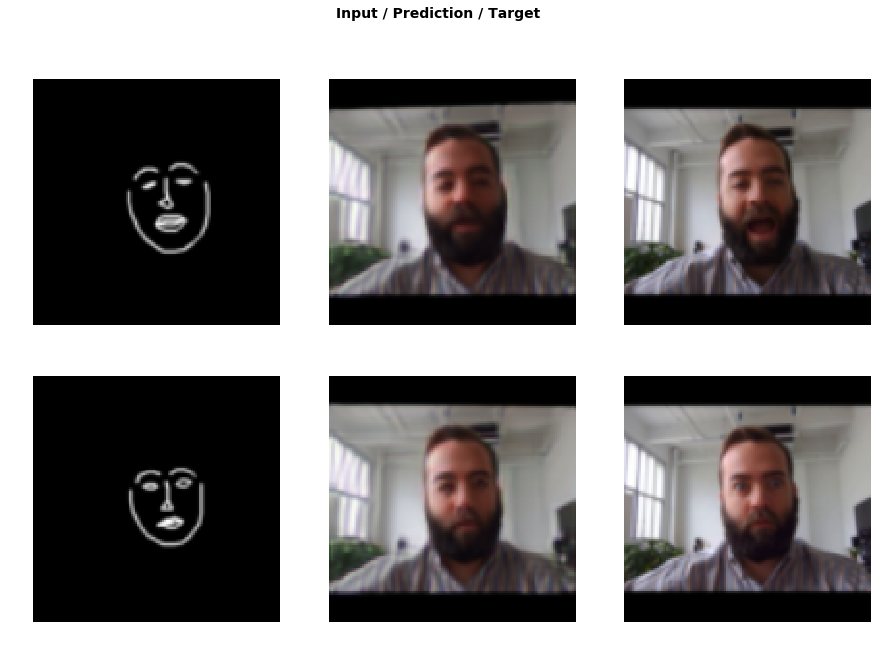

In [51]:
learn.freeze()
# do_fit('myFace-Generator-1b', slice(1e-5,lr), epochs=100)
do_fit('myFace-Generator-1c', slice(1e-5,lr), epochs=200)

In [62]:
# learn.export('myFace-Generator-1c-exporttest') #didn't seem to work

In [3]:
# learn.destroy()

In [55]:
wd = 1e-3
learn = unet_learner(data, arch, wd=wd, loss_func=feat_loss, callback_fns=LossMetrics,
                     blur=True, norm_type=NormType.Weight)
gc.collect();

In [59]:
learn.load('myFace-Generator-1c')

Learner(data=ImageDataBunch;

Train: LabelList (486 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96;

Valid: LabelList (54 items)
x: ImageImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)

In [68]:
# learn.layer_groups

## Medium Rez Training and Fine Tuning
could probably redo, only did 20 epochs for training the outer layer before unfreezing and doing 200 epochs.

In [ ]:
bs, size = 6, 256

In [70]:
#double the size, so halve the bs
data = get_data(bs,size)

In [71]:
#reset the data to the larger size, freeze the first layers, and release the GPU
learn.data = data

In [76]:
learn.load('myFace-Generator-1c');

/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type FeatureLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
learn_log = [('myFace-Generator-256a', 'frozen', 20, 1e-5, 3e-1)] #can double check w/ the loader

In [ ]:
learn_log = [('myFace-Generator-256a', 'frozen', 20, 1e-5, 3e-1)] #can double check w/ the loader
do_fit('myFace-Genearator-256a', slice(1e-5, 3e-1), epochs=20)

In [ ]:
data.show_batch(ds_type=DatasetType.Train, rows=2, figsize=(3,3))

In [78]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


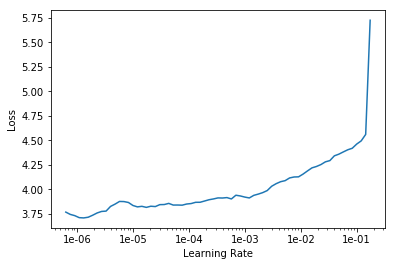

In [82]:
learn.recorder.plot()

In [ ]:
#lr = 3e-2
do_fit('myFace-Generator-256b', slice(1e-5, 3e-1), epochs=200)

epoch,train_loss,valid_loss,pixel,feat_0,feat_1,feat_2,gram_0,gram_1,gram_2,time
0,3.884543,2.672139,0.711544,0.193686,0.225873,0.214890,0.234460,0.382498,0.709186,00:46
1,3.846864,2.535347,0.654624,0.185725,0.209071,0.201262,0.232627,0.388048,0.663988,00:47
2,3.769190,2.472572,0.636523,0.181931,0.205751,0.201818,0.219492,0.362445,0.664613,00:47
3,3.736826,2.795253,0.792454,0.201059,0.232662,0.215389,0.255496,0.419921,0.678271,00:48
4,3.676614,2.387586,0.579903,0.172553,0.195008,0.190934,0.215861,0.379141,0.654186,00:48
5,3.690578,2.526083,0.645684,0.179976,0.202117,0.211094,0.219034,0.350505,0.717673,00:48
6,3.644293,2.495264,0.673860,0.180459,0.200998,0.194899,0.224715,0.363814,0.656519,00:48
7,3.672501,2.367998,0.598185,0.174195,0.194843,0.196796,0.214593,0.346298,0.643088,00:48
8,3.640376,2.584332,0.640413,0.182993,0.205349,0.208261,0.229182,0.392764,0.725371,00:48
9,3.604103,2.319366,0.594989,0.174404,0.191789,0.188032,0.200705,0.327801,0.641647,00:48


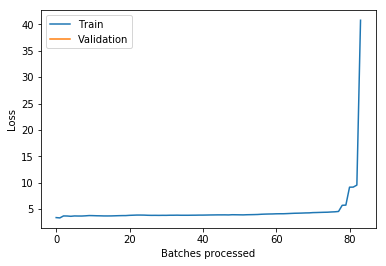

In [81]:
learn.recorder.plot_losses()

In [ ]:
bs = 

In [222]:
gc.collect()
data = get_data(6,size*2)

In [77]:
data.valid_ds.items
# filepaths for original imgs

array([PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/64.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/481.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/20.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/75.png'), ...,
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/236.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/309.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/31.png'),
       PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/landmarks-96/260.png')],
      dtype=object)

# Using Model

Load model and use on facial landmark frames

In [99]:
len(learn.data.train_ds.items)

486

In [ ]:
#need to update these paths, use imagenet_stats for normalization? Why 3 classes?
data_mr = (ImageImageList.from_folder(path_mr).split_by_rand_pct(0.1, seed=42)
          .label_from_func(lambda x: path_hr/x.name)
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data_mr.c = 3

In [ ]:
fn = data_mr.valid_ds.x.items[0];
img = open_image(fn); img.shape
p,img_hr,b = learn.predict(img)
show_image(img, figsize=(18,15), interpolation='nearest');

In [54]:
learn.predict(y_hat_train)

AttributeError: 'numpy.ndarray' object has no attribute 'apply_tfms'

In [43]:
il.items[0]

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace/training/304.png')

In [ ]:
# defaults.cmap='binary'

In [44]:
il

ImageList (564 items)
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace

In [55]:
il

ImageList (564 items)
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/images/KrisFace

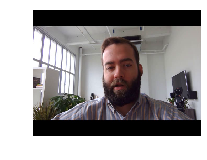

In [54]:
il[0].show()
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(9,9))

In [104]:
type(data)

fastai.vision.data.ImageDataBunch

### Refactor

In [ ]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [ ]:
model = nn.Sequential(
    conv2(1, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, 10), # 1
    Flatten()      # remove (1,1) grid
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [ ]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy
1,0.228332,0.206325,0.937500
2,0.189966,0.192558,0.940800
3,0.156765,0.092810,0.969100
4,0.135871,0.083914,0.973300
5,0.108844,0.071582,0.978000
6,0.105887,0.128586,0.960200
7,0.080699,0.052754,0.983200
8,0.066007,0.037588,0.988600
9,0.047513,0.030255,0.990200
10,0.044705,0.028373,0.991600


### Resnet-ish

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [3]:
help(conv_layer)

Help on function conv_layer in module fastai.layers:

conv_layer(ni: int, nf: int, ks: int = 3, stride: int = 1, padding: int = None, bias: bool = None, is_1d: bool = False, norm_type: Union[fastai.layers.NormType, NoneType] = <NormType.Batch: 1>, use_activ: bool = True, leaky: float = None, transpose: bool = False, init: Callable = <function kaiming_normal_ at 0x7f0ab4821bf8>, self_attention: bool = False)
    Create a sequence of convolutional (`ni` to `nf`), ReLU (if `use_activ`) and batchnorm (if `bn`) layers.



In [ ]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense:bool=False, norm_type:Union[fastai.layers.NormType, NoneType]=<NormType.Batch: 1>, bottle:bool=False, **kwargs)
    Resnet block of `nf` features.



In [ ]:
model = nn.Sequential(
    conv2(1, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    Flatten()
)

In [ ]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [ ]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


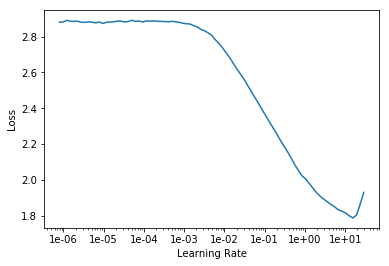

In [ ]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(12, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy
1,0.248807,0.121582,0.972800
2,0.120927,0.360583,0.890300
3,0.104013,0.074916,0.977800
4,0.081181,0.065717,0.980000
5,0.068514,0.096448,0.967200
6,0.061274,0.087955,0.971800
7,0.051673,0.033911,0.989400
8,0.048090,0.033234,0.988800
9,0.039095,0.024638,0.992400
10,0.023670,0.021215,0.993400


In [ ]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     72         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________

## fin